<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/%EA%B7%B8%EB%9E%98%EB%94%94%EC%96%B8%ED%8A%B8%EB%B6%80%EC%8A%A4%ED%8C%85%ED%9A%8C%EA%B7%80%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
그래디언트 부스팅 회귀 트리는 여러 개의 decision tree 를 묶어 강력한 모델을 만든는 또 다른 ensemble 방법이다.
이름이 회귀지만 이 모델은 회귀와 분류 모두에 사용할 수 있다.
랜덤포레스트와는 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없다. 대신 강력한 사전 가지치기가 사용된다.
보통 하나에 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠른다.
약한 학습기(weak learner)을 많이 연결하는 것이다. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서
트리가 많이 추가될수록 성능이 좋아진다. 그래디언트 부스팅 트리는 머신러닝 경연 대회에서 우승을 많이 차지하였고 업계에서도 널리
사용한다. 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공해준다.

앙상블 방식에 있는 사전 가지치기나 트리 개수 외에도 그래디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보장할
것인지를 제어하는 learning_rate이다. 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만든다.
n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아진다.

아래는 유방암 데이터셋을 이용해 GradientBoostingClassifier를 사용한 예이다. 기본값인 깊이가 3인 트리 100개와 학습률 0.1을 사용하였다.
참고 : scikit-learn에서 제공하는 GradientBoostingClassifier와 GradientBoostingRegressor 모두 회귀 트리인 DecisionTreeRegressor를
사용하여 그래디언트 부스팅 알고리즘을 구현하고 있다.

그래디언트 부스팅은 이전에 만든 트리의 예측과 타깃값 사이의 오차를 줄이는 방향으로 새로운 트리를 추가하는 알고리즘이다.
이를 위해 손실 함수를 정의하고 경사 하강법을 사용하여 다음에 추가될 트리가 예측해야 할 값을 보정해나간다.

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.965034965034965


In [ ]:
훈련 세트의 정확도가 100%이므로 과대적합된 것 같다. 과대적합을 막기 위해서 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있다.

In [6]:
gbrt = GradientBoostingClassifier(max_depth=1, random_state = 0)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도: {}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {}".format(gbrt.score(X_test, y_test)))
gbrt = GradientBoostingClassifier(learning_rate=0.01 , random_state = 0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {}".format(gbrt.score(X_test, y_test)))

# 모델의 복잡도를 감소시켜서 훈련 세트의 정확도가 낮아졌다.
# 이 예에서 학습률을 낮추는 것은 테스트 세트의 성능을 조금밖에 개선하지 못했지만, 트리의 최대 깊이를 낮추는 것은 모델 성능 향상에
# 크게 기여했다.


훈련 세트 정확도: 0.9906103286384976
테스트 세트 정확도: 0.972027972027972
훈련 세트 정확도: 0.9882629107981221
테스트 세트 정확도: 0.965034965034965


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

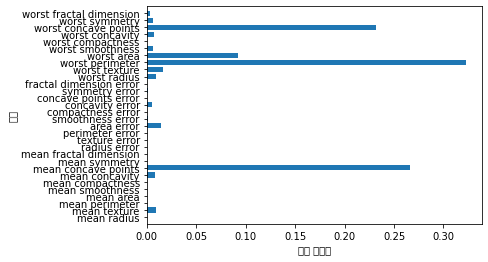

In [14]:
# 다른 decision tree 기반의 모델처럼 특성의 중요도를 시각화하면 모델을 더 잘 이해할 수 있다.
# 트리를 100개나 사용했으므로 깊이가 1이더라도 모든 트리를 분석하기는 쉽지 않다.
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(gbrt)
""""
그래디언트 부스팅 트리의 특성 중요도 그래프가 랜덤 포레스트의 특성 중요도와 비슷하다.
다만 그래디언트 부스팅은 일부 특성을 완전히 무시하고 있다.
보통 더 안정적인 랜덤 포레스트를 먼저 적용하곤 한다.
랜덤 포레스트가 잘 작동하더라도 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그래디언트 부스팅을 사용하면
도움이 된다. 대규모 머신러닝 문제에 그래디언트 부싕을 적용하려면 xgboost 패키지와 파이썬 인터페이스를 검토해보는 것이 좋다.
책에서 이 글을 쓰는 시점에는 여러 가지 데이터셋에서 scikit-learn의 그래디언트 부스팅 구현보다 빠르고 튜닝하기도 쉽다 나와있다.
옮긴이 : xgboost(https://xgboost.readthedocs.io/)는 대용량 분사 처리를 위한 그래디언트 부스팅 오픈 소스 라이브러리로 C++,파이썬,R,
자바 등 여러 인터페이스를 지원한다. 최근에는 GPU를 활용한 플러그인도 추가되었다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

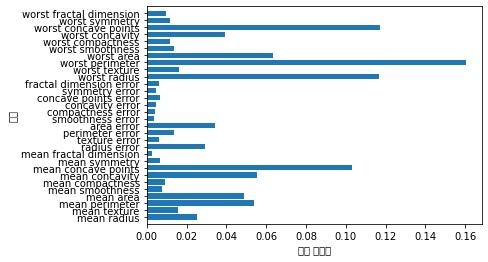

In [13]:
plot_feature_importances_cancer(forest)

In [ ]:
장단점과 매개변수

그래디언트 부스팅 결정 트리는 지도 학습에서 가장 강력하고 널리 사용하는 모델 중 하나이다.
가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것이다.
다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이 연속적인 특성에서도 잘 작동한다.
그리고 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않는다.
그래디언트 부스팅 트리 모델의 중요 매개변수는 트리의 개수를 지정하는 n_estimators와 이전 트리의 오차를 보정하는 정도를 조절하는
learning_rate이다. 이 두 매개변수는 매우 깊게 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를
추가해야 한다.////// n_estimors가 클수록 좋은 랜덤 포레스트와는 달리 그래디언트 부스팅에서 n_estimators를 크게 하면 모델이 복잡해지고
과대적합될 가능성이 높아진다./////////
일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는 것이다.
중요한 또 다른 매개변수는 각 트리의 복잡도를 낮추는 max_depth(또는 max_leaf_nodes)이다.
통상 그래디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 한다.